In [1]:
import pandas as pd
from helpers import *
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import lime
import lime.lime_tabular
import shap

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[LawSchoolGPA]'
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
## Load the pre-processed dataset.
df=pd.read_csv("./data/standard_df.csv")

## Create a list with the protected attributes that are going to be used. 
prot_attr=['Previous_qualification', 'Debtor', 'Tuition_fees_up_to_date']

In [3]:
## Split the dataset and standardize it. 

X_train, X_test, y_train, y_test, indices_train, indices_test=standardized_dataset_output(
                                                                                            df,
                                                                                            prot_attr,
                                                                                            'Target'
                                                                                        )

In [4]:
## Create an XGBoost classifier
xgb_model = XGBClassifier()

## Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

## Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

### LIME

In [9]:
# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns.tolist(), 
    mode='classification'
)

# Explain a prediction
idx = 1  # Index of the sample to explain

# Use .iloc[idx] to ensure a single row is selected and .values to convert it to array
exp = explainer.explain_instance(X_test.iloc[idx].values, grid_search.predict_proba)
exp.show_in_notebook(show_table=True)

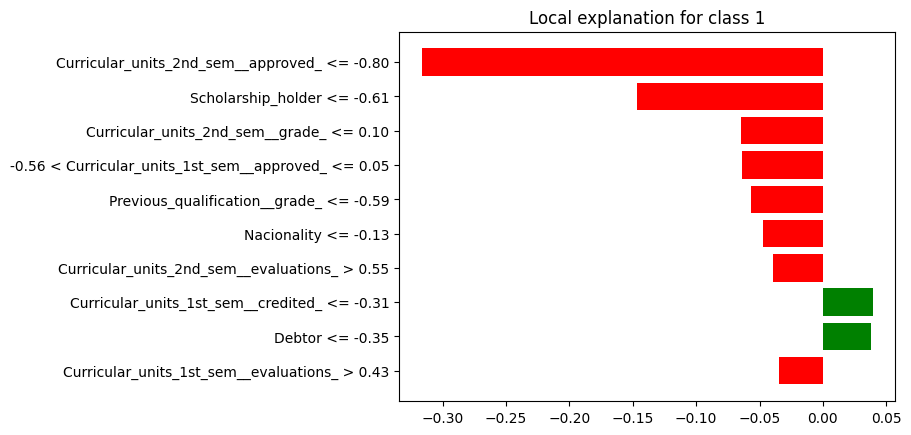

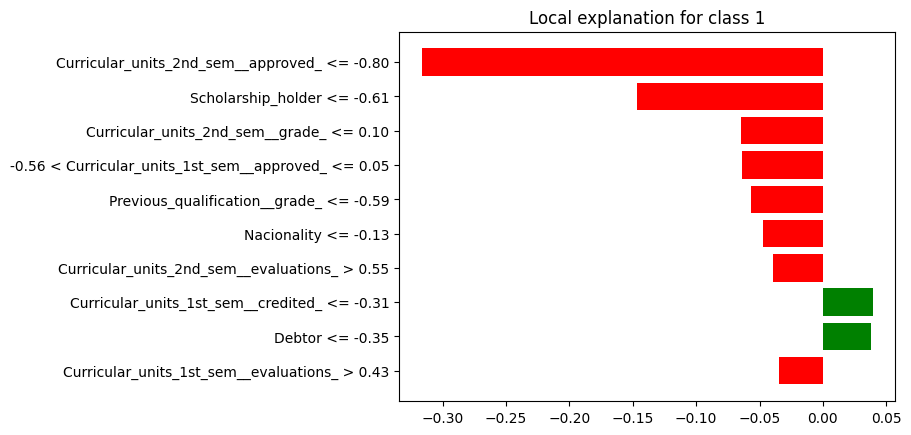

In [11]:
instance_to_explain = X_test.iloc[2].values if isinstance(X_test, pd.DataFrame) else X_test[2]
exp = explainer.explain_instance(instance_to_explain, grid_search.predict_proba, num_features=10)
exp.as_pyplot_figure(label=exp.available_labels()[0])

### SHAP

In [5]:
# Fit the best model
model = grid_search.best_estimator_

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 1090it [01:50,  9.40it/s]                          


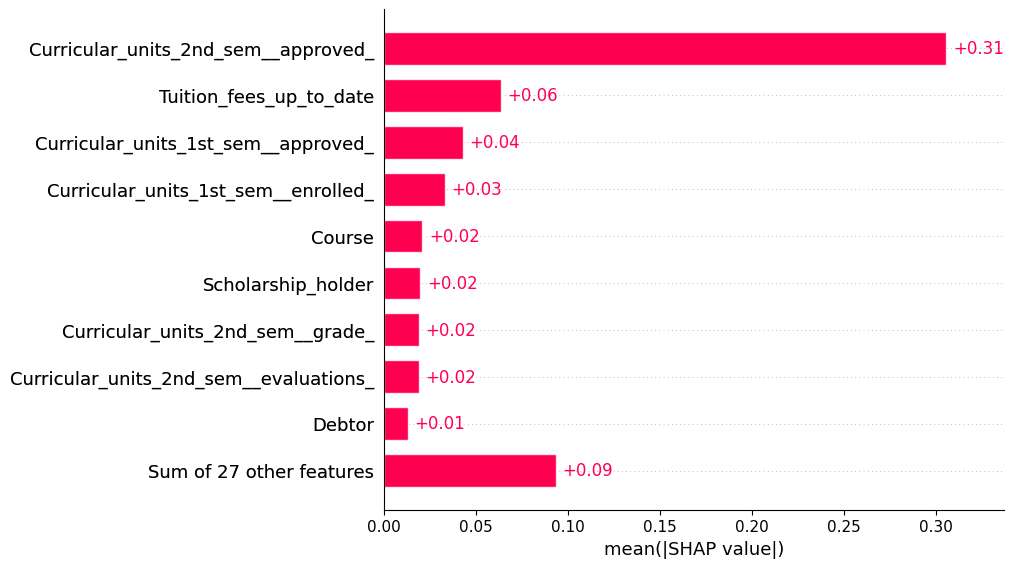

In [6]:
shap.plots.bar(shap_values)

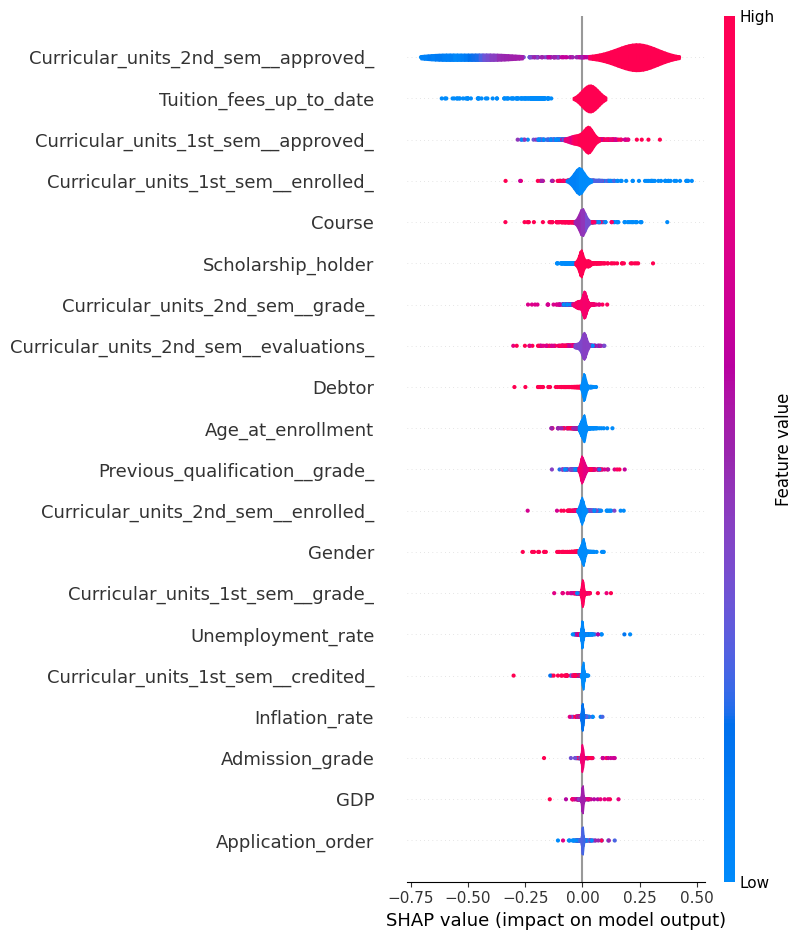

In [7]:
shap.summary_plot(shap_values, plot_type='violin')

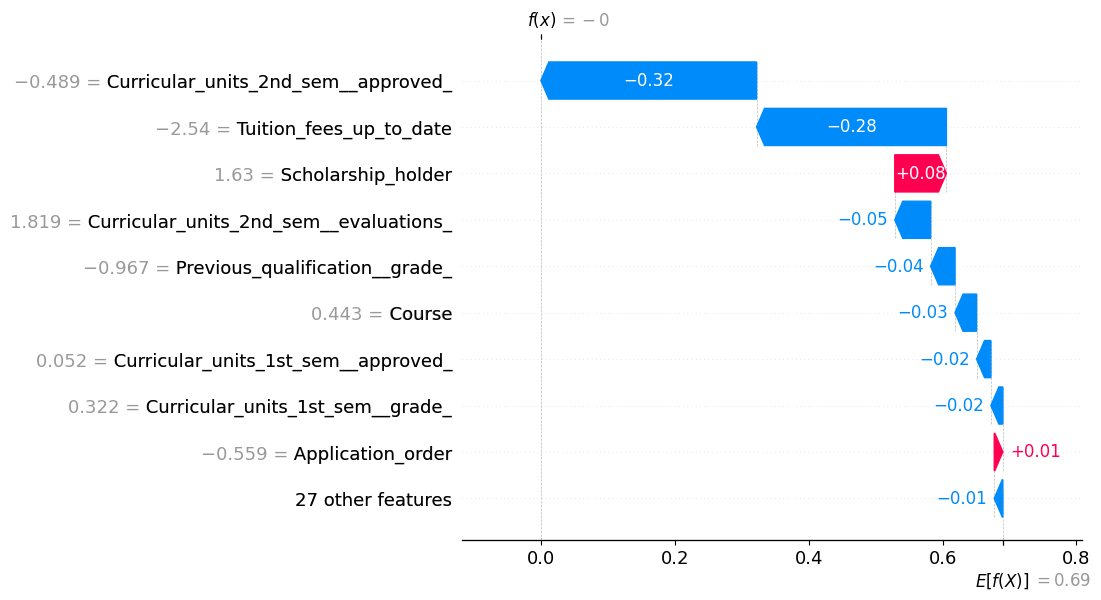

In [54]:
shap.plots.waterfall(shap_values[27])

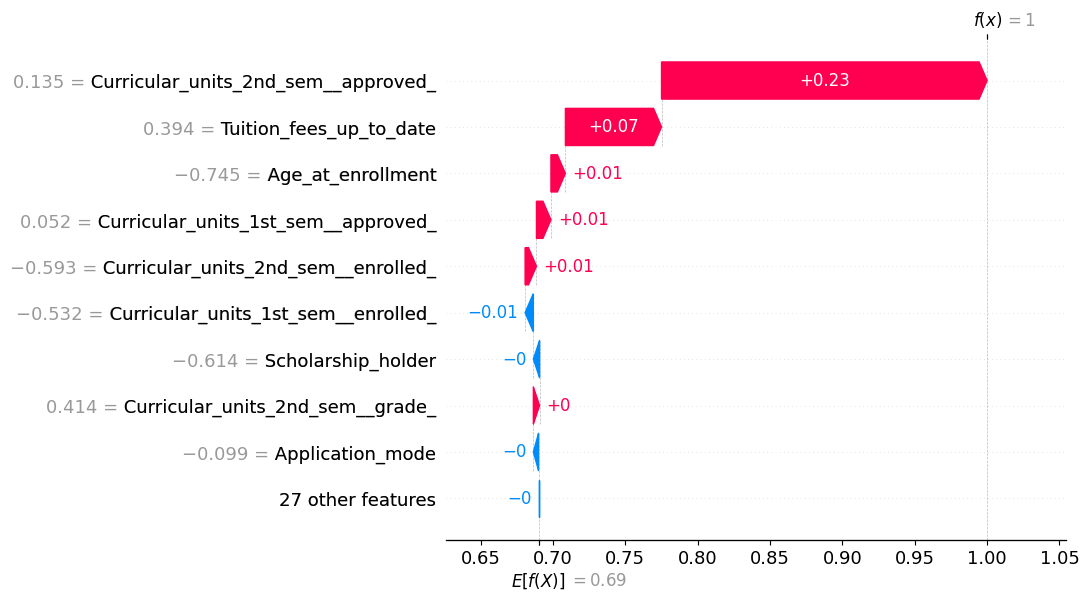

In [64]:
shap.plots.waterfall(shap_values[7])

In [39]:
X_test['index']=[index for index in range(0, len(X_test))]

In [60]:
X_test[X_test.index==(0, 0, 1)]['index']

Previous_qualification  Debtor  Tuition_fees_up_to_date
0                       0       1                             0
                                1                             1
                                1                             3
                                1                             4
                                1                             7
                                                           ... 
                                1                          1083
                                1                          1085
                                1                          1086
                                1                          1087
                                1                          1088
Name: index, Length: 754, dtype: int64